# Entregable No.3 
## Datos a tomar en cuenta: 

## 1)  Entregable No.3 para la empresa "Vanish"
## 2) Nuestro objetivo será poder clasificar productos y/o regiones en diferentes grupos (clusters) , de modo que podamos aprovechar la clasificación para obtener información que nos permita obtener algún tipo de beneficio, 
## 3) Crearemos gráficos para su fácil o sencilla interpretación 

# Importar, analizar y limpiar datos 
## Como ya hemos trabajado estos mismos datos para juntarlos usaré la base de datos que elaboramos en la anterior entrega 

In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("ventas_filtradas.csv")
df

,WEEK_x,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,WEEK_y,YEAR,MONTH,...,ATTR2_x,ATTR3_x,ID_CATEGORY,CATEGORY_cat,CATEGORY,ATTR1_y,ATTR2_y,ATTR3_y,FORMAT_y,SEGMENT
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,34-22,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,34-22,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,34-22,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,34-22,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,34-22,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,26-23,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,26-23,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,26-23,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,26-23,NaN,NaN,NaN,...,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Eliminamos todas las columnas que contengan almenos un valor Nulo o Nan
df = df.dropna(axis=1, how="any")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   WEEK_x                       122002 non-null  object 
 1   TOTAL_UNIT_SALES             122002 non-null  float64
 2   TOTAL_VALUE_SALES            122002 non-null  float64
 3   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 4   REGION                       122002 non-null  object 
 5   YEAR_WEEK                    122002 non-null  object 
 6   MANUFACTURER                 122002 non-null  object 
 7   BRAND                        122002 non-null  object 
 8   ITEM_DESCRIPTION             122002 non-null  object 
 9   CATEGORY_sale                122002 non-null  int64  
 10  FORMAT_x                     122002 non-null  object 
 11  ATTR1_x                      122002 non-null  object 
 12  ATTR2_x                      122002 non-null  object 
 13 

In [20]:
# Eliminaremos Item code porque no parece ser demasiado útil para el algoritmo K-MEANS
df = df.drop("ITEM_CODE", axis=1)


,WEEK_x,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,ITEM_DESCRIPTION,CATEGORY_sale,FORMAT_x,ATTR1_x,ATTR2_x,ATTR3_x,ID_CATEGORY,CATEGORY_cat
0,34-22,0.006,0.139,1.000,TOTAL AUTOS AREA 5,34-22,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
1,34-22,0.487,116.519,2.916,TOTAL AUTOS AREA 5,34-22,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
2,34-22,1.391,68.453,5.171,TOTAL AUTOS AREA 5,34-22,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
3,34-22,0.022,1.481,1.833,TOTAL AUTOS AREA 5,34-22,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
4,34-22,2.037,182.839,5.375,TOTAL AUTOS AREA 5,34-22,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,26-23,RECKITT,VANISH,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
121998,26-23,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,26-23,RECKITT,VANISH,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,1,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
121999,26-23,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,26-23,RECKITT,VANISH,VANISH PODER O2 DOYPACK 120 GR 7501058753441,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
122000,26-23,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,26-23,RECKITT,VANISH,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT


In [98]:
df = df.drop("ATTR2_x", axis = 1)

In [28]:
df["ATTR2_x"].unique()

array(['FABRIC TREATMENT', 'CLORO', 'SANITIZANTE'], dtype=object)

In [ ]:
## YEAR_WEEK Y WEEK_x se repiten entonces elimaremos una 
df = df.drop(["WEEK_x"], axis = 1)

In [32]:
# The code: df1['REGION'].unique() has the output:
#array(['TOTAL AUTOS AREA 5', 'TOTAL AUTOS AREA 6','TOTAL AUTOS SCANNING MEXICO' 0, 
#'TOTAL AUTOS AREA 3','TOTAL AUTOS AREA 2', 'TOTAL AUTOS AREA 1', 'TOTAL AUTOS AREA 4'],dtype=object)

#Debido a esto voy a codificar las areas en numero para poder aplicar el método de k-means
from sklearn import preprocessing

# Asignaremos el número correspondiente de cada area: area 1 = 1, etc.
area_num = {"TOTAL AUTOS AREA 1": 1, "TOTAL AUTOS AREA 2": 2, "TOTAL AUTOS AREA 3": 3, "TOTAL AUTOS AREA 4":4,
            "TOTAL AUTOS AREA 5": 5, "TOTAL AUTOS AREA 6": 6, "TOTAL AUTOS SCANNING MEXICO": 0}
df["REGION"] = df["REGION"].map(area_num)


,WEEK_x,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,ITEM_DESCRIPTION,CATEGORY_sale,FORMAT_x,ATTR1_x,ATTR2_x,ATTR3_x,ID_CATEGORY,CATEGORY_cat
0,34-22,0.006,0.139,1.000,5,34-22,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
1,34-22,0.487,116.519,2.916,5,34-22,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
2,34-22,1.391,68.453,5.171,5,34-22,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
3,34-22,0.022,1.481,1.833,5,34-22,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
4,34-22,2.037,182.839,5.375,5,34-22,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,1.192,150.829,4.000,0,26-23,RECKITT,VANISH,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
121998,26-23,1.947,235.416,2.797,0,26-23,RECKITT,VANISH,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,1,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
121999,26-23,18.013,429.289,9.102,0,26-23,RECKITT,VANISH,VANISH PODER O2 DOYPACK 120 GR 7501058753441,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT
122000,26-23,21.152,210.276,22.172,0,26-23,RECKITT,VANISH,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,FABRIC TREATMENT AND SANIT


In [ ]:
df["YEAR_WEEK"] = df["YEAR_WEEK"].str.extract(r"(\d+)").astype(int)
df["YEAR_WEEK"] = df["YEAR_WEEK"].astype(int)


In [72]:
df = df.drop("CATEGORY_sale", axis = 1)
df

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT_x,ATTR1_x,ATTR2_x,ATTR3_x,CATEGORY_cat
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,VANISH PODER O2 DOYPACK 120 GR 7501058753441,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT


In [68]:
df = df.drop("ID_CATEGORY", axis=1, errors="ignore")
df

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,ITEM_DESCRIPTION,CATEGORY_sale,FORMAT_x,ATTR1_x,ATTR2_x,ATTR3_x,CATEGORY_cat
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,1,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,VANISH PODER O2 DOYPACK 120 GR 7501058753441,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT


In [70]:
df["CATEGORY_sale"].unique()

array([1], dtype=int64)

In [82]:
df = df.drop("ITEM_DESCRIPTION", axis=1)


,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x,ATTR2_x,ATTR3_x,CATEGORY_cat
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
...,...,...,...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,LIQUIDO,PRELAVADOR,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,FABRIC TREATMENT AND SANIT


In [106]:
df = df.drop("CATEGORY_cat", axis = 1)


,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,LIQUIDO,PRELAVADOR
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH


In [108]:
df

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,POLVO,SAFE BLEACH
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,LIQUIDO,PRELAVADOR
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,POLVO,SAFE BLEACH


In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ATTR1_x"] = le.fit_transform(df["ATTR1_x"])
df

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,POLVO,2
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,POLVO,2
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,POLVO,2
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,POLVO,2
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,POLVO,2
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,POLVO,2
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,LIQUIDO,1
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,POLVO,2
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,POLVO,2


In [126]:
formato = LabelEncoder()
df["FORMAT_x"] = formato.fit_transform(df["FORMAT_x"])

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,0.006,0.139,1.000,5,34,RECKITT,VANISH,3,2
1,0.487,116.519,2.916,5,34,RECKITT,VANISH,3,2
2,1.391,68.453,5.171,5,34,RECKITT,VANISH,3,2
3,0.022,1.481,1.833,5,34,RECKITT,VANISH,3,2
4,2.037,182.839,5.375,5,34,RECKITT,VANISH,3,2
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,VANISH,3,2
121998,1.947,235.416,2.797,0,26,RECKITT,VANISH,2,1
121999,18.013,429.289,9.102,0,26,RECKITT,VANISH,3,2
122000,21.152,210.276,22.172,0,26,RECKITT,VANISH,3,2


In [134]:
# Decodificador para cada Marca 
mapa_marcas = { 'VANISH': 0,
    'SHOUT': 1,
    'LA VALENCIANA': 2,
    'LOS PATITOS': 3,
    'OXI CLEAN': 4,
    'CLARASOL': 5,
    'CLOROX': 6,
    'DR.BECKMANN': 7,
    'CLORALEX': 8,
    'CUELLOS PUNOS Y MANCHITAS': 9,
    'BANDERA': 10,
    'BCLORHADA': 11,
    'PURO SOL': 12,
    'OTHERS MARCA UNIF.': 13,
    'TIDE': 14,
    'LYSOL': 15,
    'BLANCATEL': 16,
    'CLORALUZ': 17,
    'CLORTEX': 18,
    'PATITO': 19,
    'SANYTOL': 20,
    'IBERIA': 21,
    'LA JAPONESA': 22,
    'HARPIC': 23
}
df["BRAND"] = df["BRAND"].map(mapa_marcas)
df

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,0.006,0.139,1.000,5,34,RECKITT,0,3,2
1,0.487,116.519,2.916,5,34,RECKITT,0,3,2
2,1.391,68.453,5.171,5,34,RECKITT,0,3,2
3,0.022,1.481,1.833,5,34,RECKITT,0,3,2
4,2.037,182.839,5.375,5,34,RECKITT,0,3,2
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,RECKITT,0,3,2
121998,1.947,235.416,2.797,0,26,RECKITT,0,2,1
121999,18.013,429.289,9.102,0,26,RECKITT,0,3,2
122000,21.152,210.276,22.172,0,26,RECKITT,0,3,2


In [142]:
mapa_fabricantes = {
    'RECKITT': 0,
    'SC JOHNSON': 1,
    'BLANQUEADORA MEXICANA': 2,
    'CHURCH & DWIGHT': 3,
    'CLARASOL': 4,
    'CLOROX': 5,
    'DELTA PRONATURA': 6,
    'INDS. ALEN': 7,
    'INDS. H24': 8,
    'JABONERA LA ESPUMA': 9,
    'LA CORONA': 10,
    'OTHERS FABRICANTE UNIF.': 11,
    'P&G': 12,
    'QUIMICA GONCAL': 13,
    'GRUPO AC MARCAS': 14,
    'IBERIA': 15,
    'LA JAPONESA': 16
}
df["MANUFACTURER"] = df["MANUFACTURER"].map(mapa_fabricantes)

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,0.006,0.139,1.000,5,34,0,0,3,2
1,0.487,116.519,2.916,5,34,0,0,3,2
2,1.391,68.453,5.171,5,34,0,0,3,2
3,0.022,1.481,1.833,5,34,0,0,3,2
4,2.037,182.839,5.375,5,34,0,0,3,2
...,...,...,...,...,...,...,...,...,...
121997,1.192,150.829,4.000,0,26,0,0,3,2
121998,1.947,235.416,2.797,0,26,0,0,2,1
121999,18.013,429.289,9.102,0,26,0,0,3,2
122000,21.152,210.276,22.172,0,26,0,0,3,2


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TOTAL_UNIT_SALES             122002 non-null  float64
 1   TOTAL_VALUE_SALES            122002 non-null  float64
 2   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 3   REGION                       122002 non-null  int64  
 4   YEAR_WEEK                    122002 non-null  int32  
 5   MANUFACTURER                 122002 non-null  int64  
 6   BRAND                        122002 non-null  int64  
 7   FORMAT_x                     122002 non-null  int32  
 8   ATTR1_x                      122002 non-null  int32  
dtypes: float64(3), int32(3), int64(3)
memory usage: 7.0 MB


# Estandarizar los datos 

In [155]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["TOTAL_UNIT_SALES", "TOTAL_VALUE_SALES", "TOTAL_UNIT_AVG_WEEKLY_SALES","REGION","YEAR_WEEK","MANUFACTURER",
                                           "BRAND",	"FORMAT_x",	"ATTR1_x"]])

df_scaled = pd.DataFrame(X_scaled, columns=["TOTAL_UNIT_SALES", "TOTAL_VALUE_SALES", "TOTAL_UNIT_AVG_WEEKLY_SALES","REGION","YEAR_WEEK","MANUFACTURER",
                                           "BRAND",	"FORMAT_x",	"ATTR1_x"])
df_scaled

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,-0.221103,-0.258040,-0.401761,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
1,-0.187921,0.074251,-0.317169,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
2,-0.125559,-0.062988,-0.217611,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
3,-0.219999,-0.254209,-0.364984,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
4,-0.080995,0.263609,-0.208605,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
...,...,...,...,...,...,...,...,...,...
121997,-0.139287,0.172214,-0.269311,-1.425443,0.272999,-1.293711,-1.274174,1.520062,0.912044
121998,-0.087203,0.413729,-0.322423,-1.425443,0.272999,-1.293711,-1.274174,0.127895,-0.075348
121999,1.021106,0.967280,-0.044057,-1.425443,0.272999,-1.293711,-1.274174,1.520062,0.912044
122000,1.237649,0.341948,0.532983,-1.425443,0.272999,-1.293711,-1.274174,1.520062,0.912044


# Ahora que tenemos los datos elegidos y tranformados a números podemos pasar a aplicar el algoritmo K-MEANS

In [157]:
df_scaled

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR_WEEK,MANUFACTURER,BRAND,FORMAT_x,ATTR1_x
0,-0.221103,-0.258040,-0.401761,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
1,-0.187921,0.074251,-0.317169,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
2,-0.125559,-0.062988,-0.217611,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
3,-0.219999,-0.254209,-0.364984,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
4,-0.080995,0.263609,-0.208605,1.036712,0.838974,-1.293711,-1.274174,1.520062,0.912044
...,...,...,...,...,...,...,...,...,...
121997,-0.139287,0.172214,-0.269311,-1.425443,0.272999,-1.293711,-1.274174,1.520062,0.912044
121998,-0.087203,0.413729,-0.322423,-1.425443,0.272999,-1.293711,-1.274174,0.127895,-0.075348
121999,1.021106,0.967280,-0.044057,-1.425443,0.272999,-1.293711,-1.274174,1.520062,0.912044
122000,1.237649,0.341948,0.532983,-1.425443,0.272999,-1.293711,-1.274174,1.520062,0.912044


In [159]:
from sklearn.cluster import KMeans

#### Solo usaremos unas cuantas columnas

In [168]:
fields = df_scaled.iloc[:, [0,1,2,3]].values
print(fields)

[[-0.22110293 -0.2580403  -0.40176089  1.03671164]
 [-0.18792124  0.07425081 -0.31716946  1.03671164]
 [-0.12555899 -0.06298844 -0.21761118  1.03671164]
 ...
 [ 1.02110618  0.9672796  -0.04405747 -1.42544318]
 [ 1.23764944  0.34194816  0.53298321 -1.42544318]
 [-0.12024716  0.60376375 -0.35460867 -1.42544318]]


In [170]:
kmeans = KMeans (n_clusters = 4, init = "k-means++", random_state = 4 )
cluster_values = kmeans.fit_predict (fields)
print (cluster_values)

[1 1 1 ... 3 3 3]


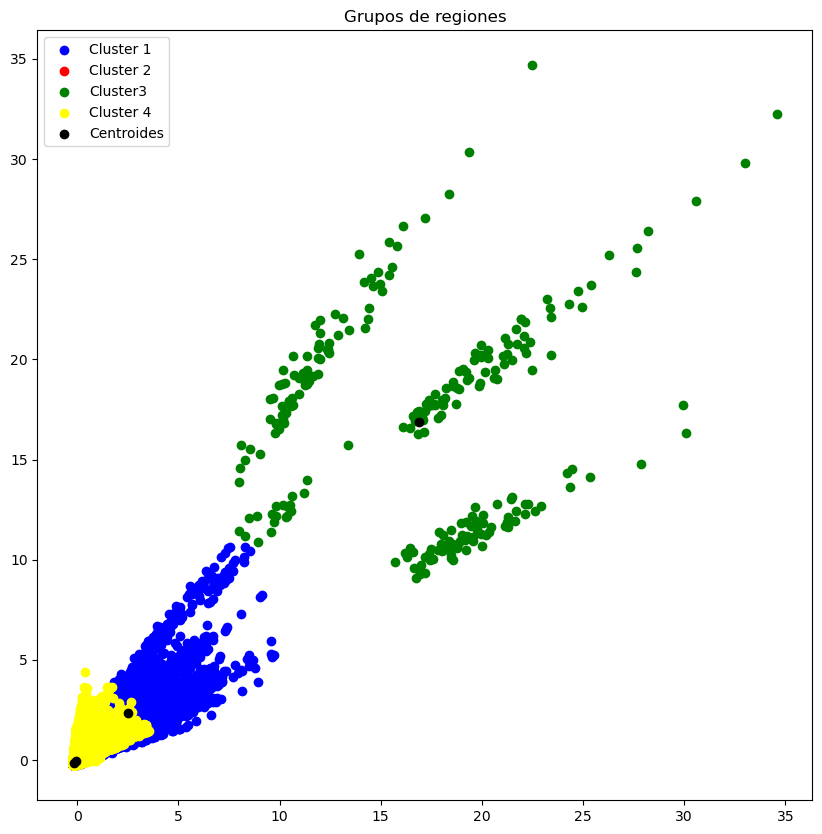

In [174]:
import matplotlib.pyplot as mp

mp.figure(figsize =(10,10))
mp.scatter(fields[cluster_values == 0,0], fields[cluster_values == 0,1], c='blue', label= 'Cluster 1')
mp.scatter(fields[cluster_values == 1,0], fields[cluster_values == 1,1], c='red', label= 'Cluster 2')
mp.scatter(fields[cluster_values == 2,0], fields[cluster_values == 2,1], c='green', label= 'Cluster3')
mp.scatter(fields[cluster_values == 3,0], fields[cluster_values == 3,1], c='yellow', label= 'Cluster 4')
mp. scatter(kmeans.cluster_centers_[ : , 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroides' )
mp. title ("Grupos de regiones")
mp. legend ()

In [176]:
# Criterio de Silueta ("Silhouette")
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
X = df_scaled.iloc[:,[0,1,2,3]] .to_numpy ()
for j in range(2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 4)
    kmeans.fit_predict (X)
# Calculamos el Score de Silueta
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    print ("Score Silhuoette; ", "k = ", j, ":", score)

Score Silhuoette;  k =  2 : 0.9279251590077473
Score Silhuoette;  k =  3 : 0.46686543249528967
Score Silhuoette;  k =  4 : 0.504534148718887
Score Silhuoette;  k =  5 : 0.5092823326052159
Score Silhuoette;  k =  6 : 0.5102195218075005
Score Silhuoette;  k =  7 : 0.5179268591536443
Score Silhuoette;  k =  8 : 0.5239697589138367
Score Silhuoette;  k =  9 : 0.4545459157216848
Score Silhuoette;  k =  10 : 0.4560499566519057
Score Silhuoette;  k =  11 : 0.4619850572433179


### El mejor número de clusters para usar termina siendo 2 
ahora probaremos con 3 columnas y con un pca descomposition 


In [213]:
fields2 = df_scaled.iloc[:, [0,1,3]].values
print (fields2)

[[-0.22110293 -0.2580403   1.03671164]
 [-0.18792124  0.07425081  1.03671164]
 [-0.12555899 -0.06298844  1.03671164]
 ...
 [ 1.02110618  0.9672796  -1.42544318]
 [ 1.23764944  0.34194816 -1.42544318]
 [-0.12024716  0.60376375 -1.42544318]]


In [215]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2

array([[-0.52885636,  0.95416663],
       [-0.27480381,  0.99985101],
       [-0.32698817,  0.99197437],
       ...,
       [ 1.65023332, -1.13295949],
       [ 1.36557633, -1.17861901],
       [ 0.60610608, -1.34261416]])

In [217]:
kmeans = KMeans (n_clusters = 2, init = "k-means++", random_state = 4 )
cluster_values = kmeans.fit_predict (fields)
print (cluster_values)

[0 0 0 ... 0 0 0]


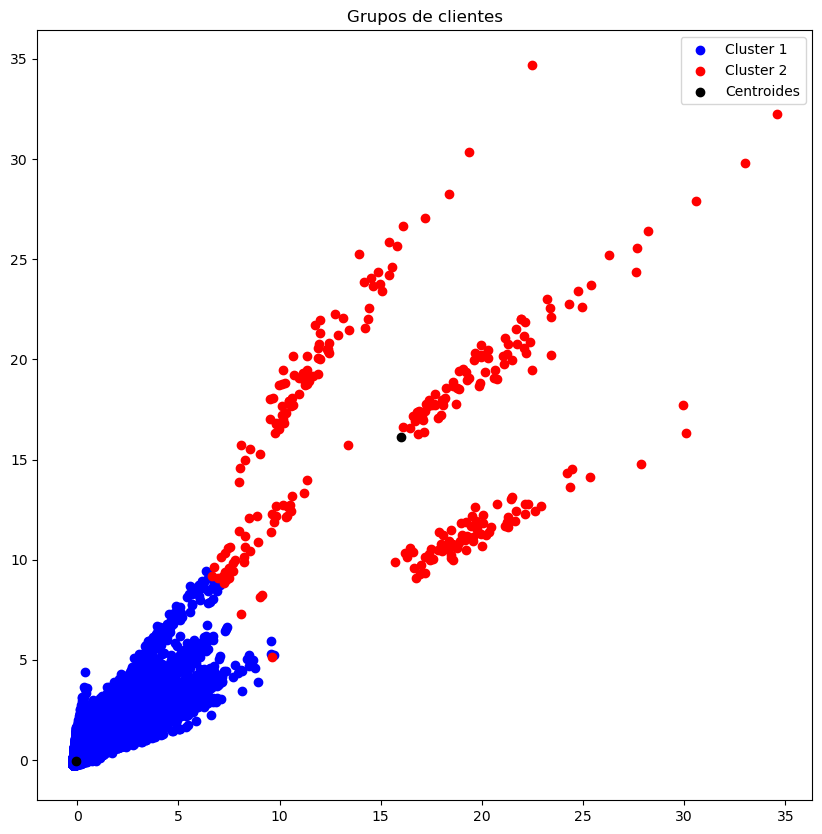

In [219]:
mp.figure(figsize =(10,10))
mp.scatter(fields[cluster_values == 0,0], fields[cluster_values == 0,1], c='blue', label= 'Cluster 1')
mp.scatter(fields[cluster_values == 1,0], fields[cluster_values == 1,1], c='red', label= 'Cluster 2')
mp. title ("Grupos de clientes")
mp. scatter(kmeans.cluster_centers_[ : , 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroides' )
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp. legend ()

TypeError: 'str' object is not callable

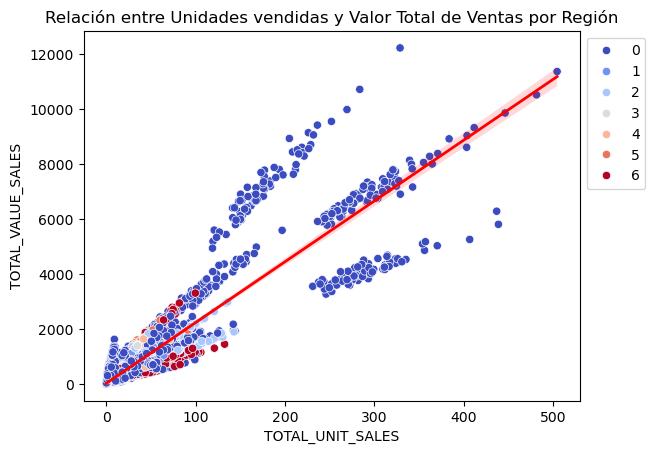

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
ax = sns.scatterplot(
    data=df,
    x="TOTAL_UNIT_SALES",
    y="TOTAL_VALUE_SALES",
    hue="REGION",
    palette="coolwarm"
)
# Crear el regretion plot, línea de regresión
sns.regplot(
    data=df,
    x="TOTAL_UNIT_SALES",
    y="TOTAL_VALUE_SALES",
    scatter=False,    # Evita que se vuelvan a dibujar los puntos
    ax=ax,            # Dibujar la línea en el mismo eje
    color="red",    # Color de la línea de regresión
    line_kws={"linewidth": 2}  # Ancho de la línea
)

# Mover la leyenda fuera del gráfico
ax.legend(loc="upper left", bbox_to_anchor=(1, 1)) 

# Personalizar el gráfico
plt.title("Relación entre Unidades vendidas y Valor Total de Ventas por Región")
plt.xlabel("Total Unit Sales")
plt.ylabel("Total Value Sales")
plt.savefig("6Relación entre Unidades vendidas y Valor Total de Ventas por Región.png", dpi=300, bbox_inches="tight")
plt.show()


# Podemos observar como al final nuestro algoritmo terminó haciendo dos cluster uno donde esta el area TOTAL AUTOS SCANNING MEXICO y el otro donde están todas las demás areas, esto debido a la gran importancia de el area 0 debido a sus ventas mucho mayores 

IndexError: single positional indexer is out-of-bounds

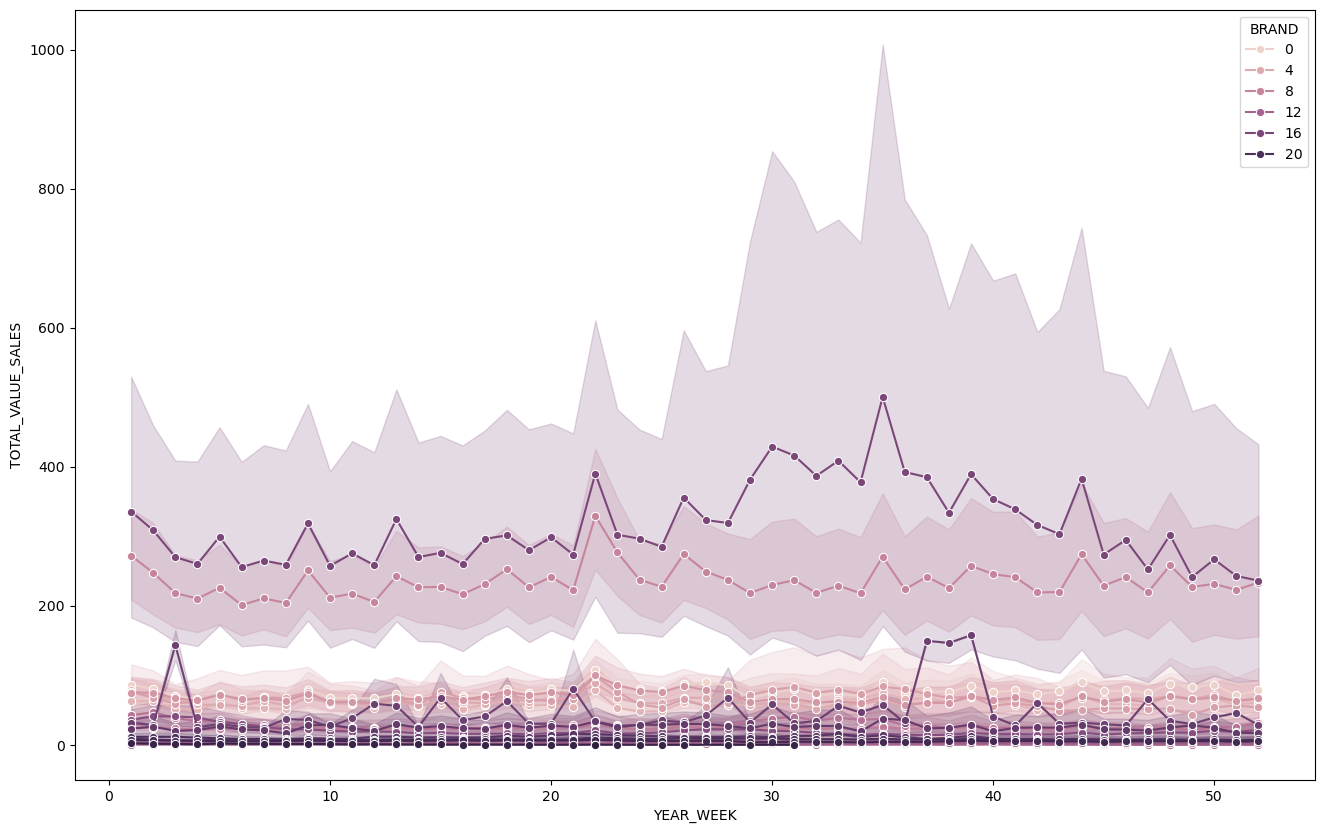

In [331]:
#Definimos el tamaño de figura y creamos nuestro gráfico lineplot

plt.figure(figsize=(16,10))
sns.lineplot(
    data=df,
    x='YEAR_WEEK',
    y='TOTAL_VALUE_SALES',
    hue='BRAND',
    marker='o'
)
#Obtener la semana en la que se alcazaron valor de ventas totales mayor o igual a 100k
meta_week = df.loc[df["TOTAL_VALUE_SALES"] >= 100000, "YEAR_WEEK"].iloc[0]

#LÍNEA DE META PARA 100K 
plt.axvline(x=meta_week, color='red', linestyle='--', linewidth=2, label=f'Semana Meta: {meta_week}')

# Agregamos titulos y etiquetas
plt.title("Tendencia de Unidades Vendidas a lo largo del tiempo por Marca")
plt.xlabel("Año-Semana")
plt.ylabel("Total Value Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(2, 2))
plt.savefig("5Tendencia de Unidades Vendidas a lo largo del tiempo por Marca.png", dpi=300, bbox_inches="tight")

plt.show()

A partir del gráfico de líneas apiladas, se observa que Vanish presenta una participación marginal en el total de ventas, ubicándose de forma constante en la base del acumulado. Su área es reducida y estable, lo que indica que su volumen de ventas es bajo y no muestra variaciones significativas a lo largo del tiempo.
Este comportamiento sugiere que Vanish podría estar posicionada en un segmento específico del mercado, con presencia sostenida pero limitada. Si se cruza esta información con los clusters previamente definidos, sería relevante analizar si Vanish tiene mayor afinidad con grupos de consumidores de bajo volumen o alta especialización, lo cual podría explicar su estabilidad pese a su bajo desempeño relativo.
En resumen, Vanish no destaca por volumen, pero su constancia podría reflejar una base de clientes leales o un nicho definido, lo que abre la puerta a estrategias de posicionamiento más focalizadas o de crecimiento en segmentos donde aún no tiene presencia significativa.

¿Quieres que lo conectemos con los clusters o con alguna métrica adicional como frecuencia de compra o ticket promedio? También puedo ayudarte a redactar una versión más académica si lo necesitas para tu entrega.


C:\Users\marco\AppData\Local\Temp\ipykernel_26612\1790742262.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  mp.boxplot([fields[cluster_values == 0,0], fields[cluster_values == 1,0]], labels=['Cluster 0', 'Cluster 1'], boxprops=dict(color='blue'))
C:\Users\marco\AppData\Local\Temp\ipykernel_26612\1790742262.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  mp. legend ()


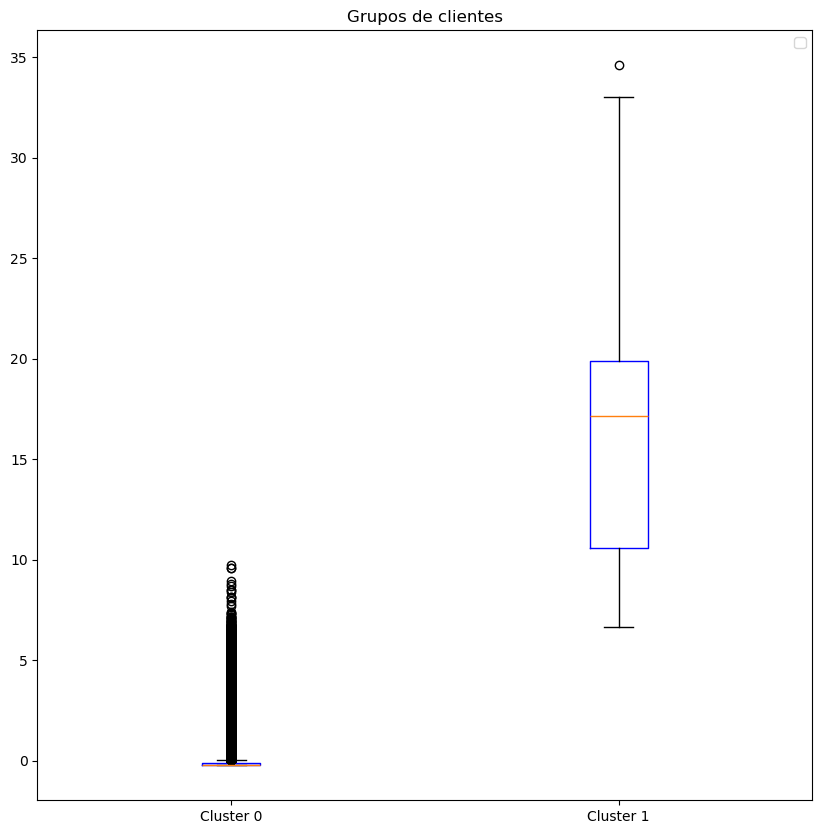

In [239]:
mp.figure(figsize =(10,10))
mp.boxplot([fields[cluster_values == 0,0], fields[cluster_values == 1,0]], labels=['Cluster 0', 'Cluster 1'], boxprops=dict(color='blue'))
mp. title ("Grupos de clientes")
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp. legend ()

 # Cluster 0:
- Distribución muy estrecha: la caja del boxplot es pequeña, lo que indica baja variabilidad.
- Valores bajos: tanto el ingreso como el score están concentrados cerca de cero.
- Muchos outliers: hay clientes que se desvían bastante del grupo, pero la mayoría está en el rango bajo.
 ## Interpretación: Este grupo podría representar clientes con bajo poder adquisitivo y bajo nivel de gasto. Tal vez son menos activos o menos rentables para el negocio.

# Cluster 1:
- Mayor dispersión: la caja es más amplia, lo que indica mayor variabilidad.
- Mediana más alta: los valores centrales están más arriba que en el Cluster 0.
- Menos outliers: más homogéneo en su rango.
## Interpretación: Este grupo parece incluir clientes con mayor ingreso y mayor disposición a gastar. Podrían ser más valiosos o más propensos a responder a estrategias de marketing.


In [336]:
# Guardar los datos 


In [346]:
# Supongamos que ya tienes el modelo entrenado
from sklearn.cluster import KMeans

# Aplicar clustering (ejemplo con 3 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'REGION',"BRAND"]])  # Ajusta las columnas según tu caso

In [348]:
resultados = df[['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'REGION',"BRAND", 'cluster']] 

In [350]:
resultados["cluster"].unique()

array([0, 1])